<a href="https://colab.research.google.com/github/SteelworkerDB/Sales_Predictions/blob/main/Prediccion_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO PREDICCIÓN DE VENTAS**
---
---
---

# PARTE 1. CARGA DE DATOS Y VISUALIZACIÓN INICIAL

---
---

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #PARA ANALISIS GRAFICO
from matplotlib.patches import Rectangle # PARA LEYENDAS

import seaborn as sns #PARA ESTILOS DE VISUALIZACION


filename="/content/sales_predictions_2023.csv"
vp_df=pd.read_csv(filename)
vp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [65]:
vp_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# PARTE 2. LIMPIEZA
---
---

In [66]:
vp_df.isna().sum() #VERIFICAR CUANTOS DATOS ESTÁN EN BLANCO
#HAY 1463 DATOS EN NAN EN Item_Weight y 2410 en Outles_Size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [67]:
vp_df.info() #PAR VERIFICAR EL TIPO DE DATOS Y EL NÚMERO DE COLUMNAS Y FILAS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 1. ¿CUÁNTAS FILAS Y COLUMNAS HAY?

---



COLUMNAS: 12
FILAS: 8523

## 2. ¿TIPOS DE DATOS DE CADA VARIABLE?

---



In [68]:
vp_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## 3. ¿DUPLICADOS?

---



In [69]:
vp_df.duplicated().sum() #VERIFICANDO DUPLICADOS

0

## 4. ¿VALORES FALTANTES?

---



In [70]:
vp_df.isna().sum() #VERIFICAR CUANTOS DATOS ESTÁN EN BLANCO
#HAY 1463 DATOS EN NAN EN Item_Weight y 2410 en Outles_Size


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 5.  TRATAMIENTO DE VALORES FALTANTES Y
## 6. VERIFICACIÓN DE QUE NO HAYA VALORES FALTANTES DESPUÉS DE ABORDADOS

---




In [71]:
#ANÁLISIS DE DATOS DE COLUMNA Item_Weight
#PARA DECIDIR TRATAMIENTO DE FALTANTES:


# AGRUPO SEGÚN COLUMNA Item_type PARA VERIFICAR SI EXISTEN DIFERENCIAS
# EN LAS DISTRIBUCIONES.
# ADICIONAL OBTENGO EL PROMEDIO TOTAL DE Item_Weight
prom_peso_tipo=vp_df.groupby('Item_Type')['Item_Weight'].mean().reset_index()
std_peso_tipo=vp_df.groupby('Item_Type')['Item_Weight'].std().reset_index()
prom_peso_total=vp_df['Item_Weight'].mean()
print('PROMEDIO DE PESOS POR TIPO\n', prom_peso_tipo)
print()
print('DEVIACIÓN ESTÁNDAR DE PESOS POR TIPO\n',std_peso_tipo)
print()
print('PROMEDIO TOTAL DE Item_Weight\n',prom_peso_total)

PROMEDIO DE PESOS POR TIPO
                 Item_Type  Item_Weight
0            Baking Goods    12.277108
1                  Breads    11.346936
2               Breakfast    12.768202
3                  Canned    12.305705
4                   Dairy    13.426069
5            Frozen Foods    12.867061
6   Fruits and Vegetables    13.224769
7             Hard Drinks    11.400328
8      Health and Hygiene    13.142314
9               Household    13.384736
10                   Meat    12.817344
11                 Others    13.853285
12                Seafood    12.552843
13            Snack Foods    12.987880
14            Soft Drinks    11.847460
15          Starchy Foods    13.690731

DEVIACIÓN ESTÁNDAR DE PESOS POR TIPO
                 Item_Type  Item_Weight
0            Baking Goods     4.773622
1                  Breads     4.440540
2               Breakfast     5.038131
3                  Canned     4.586564
4                   Dairy     4.686532
5            Frozen Foods     4.5073

 **OBSERVACIONES: Las distribuciones parecen ser parecidas.  El promedio total de pesos no se desvía mucho
 de los promedios de peso por tipo de ítem.**

In [72]:
#PARA VISUALIZAR SI EXISTE UNA RELACIÓN ENTRE LOS VALORES FALTANTES
#DE PESO Y LOS VALORES DE OTRA COLUMNA, COMO LA DE Item_Type
#SUMO LA CANTIDAD DE FALTANTES

faltantes_tipo=vp_df.groupby('Item_Type',group_keys=True)['Item_Weight'].apply(lambda x:x.isna().sum())
faltantes_tipo

#ES DIFICIL ENCONTRAR ALGUNA RELACIÓN DE LA INFORMACIÓN OBSERVADA CON LOS
#DATOS FALTANTES,.  LOS FALTANTES PARECEN SER MCAR

Item_Type
Baking Goods             112
Breads                    47
Breakfast                 21
Canned                   110
Dairy                    116
Frozen Foods             138
Fruits and Vegetables    213
Hard Drinks               31
Health and Hygiene        90
Household                151
Meat                      88
Others                    32
Seafood                   13
Snack Foods              212
Soft Drinks               71
Starchy Foods             18
Name: Item_Weight, dtype: int64

**OBSERVACIONES: No parece haber relación entre el tipo de ítem y los valores faltantes de peso.**

**LOS VALORES FALTANTES DE Item_weight PARECEN SER FALTANTES COMPLETAMENTE ALEATORIOS POR LO MENOS AL ANALIZAR LOS VALORES AGRUPADOS DE Item_Type e Item_Weight.**  

**ADEMÁS, EL PROMEDIO DE LOS PESOS PUEDE IMPUTARSE DENTRO DE LOS VALORES FALTANTES, POR LO MENOS SIN SESGO SIGNIFICATIVO HACIA EL TIPO DE ÍTEM.**


In [73]:
#IMPUTACIÓN: Reemplazo de valores faltantes de Item_Weight con el promedio
vp_df_imp=vp_df
vp_df['Item_Weight']=vp_df['Item_Weight'].fillna(prom_peso_total)
vp_df_imp.isna().sum() #VERIFICAR CUANTOS DATOS ESTÁN EN BLANCO


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**SE VERIFICÓ QUE NO HAY FALTANTES EN Item_Weight**

In [74]:
#PARA EL CASO DE LA COLUMNA OUTLET SIZE, EXISTEN TRES POSIBLES VALORES.
#VERIFICO CUÁNTAS VECES SE REPITEN LOS DATOS EN LA COLUMNA PARA
#PLANIFICAR UNA ESTRATEGIA DE IMPUTACIÓN.

vp_df_imp['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [75]:
#DEBIDO A QUE EL NUMERO DE FALTANTES ES COMPARABLE A LA CANTIDAD
#QUE EXISTE DE CADA VALOR: MEDIUM, SMALL, HIGH,
#SERÍA CONVENIENTE UNA ESTRATEGIA QUE DISTRIBUYA LOS FALTANTES ENTRE CADA UNO
#DE ESTOS VALORES.  NOTA: NO ES BUENA IDEA ELIMINAR LAS FILAS PORQUE ES
#UNA CANTIDAD MUY ALTA DE VALORES FALTANTES.

#UNA ESTRATEGIA ADECUADA SERÍA EL FORWARD FILL, LEER LA OBSERVACIÓN
#INMEDIATAMENTE ANTERIOR Y REEMPLAZAR A LA SIGUIENTE.
#SE USA EL MÉTODO FFILL DE FILLNA

vp_df_imp['Outlet_Size'].fillna(method='ffill', inplace=True)

#VERIFICANDO QUE NO HAYA FALTANTES:
vp_df_imp.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7.  ARREGLANDO CATEGORÍA INCONSISTENTE DE DATOS


---



In [76]:
vp_df_imp.groupby('Item_Fat_Content')['Item_Identifier'].count().reset_index()


,Item_Fat_Content,Item_Identifier
0,LF,316
1,Low Fat,5089
2,Regular,2889
3,low fat,112
4,reg,117


OBSERVANDO LOS DATOS LA COLUMNA Item_Fat_Content CONTIENE 3 FORMAS DE INDICAR LOW FAT (Low Fat, LF, low fat) Y 2 FORMAS DE INDICAR REGULAR (reg y Regular)

In [77]:
#PARA RESOLVER LA INCONSISTENCIA, REEMPLAZO LOS VALORES DE reg CON Regular y
#LOS VALORES DE LF con Low Fat.

vp_df_imp['Item_Fat_Content'].replace(['LF','low fat','reg'],
                                        ['Low Fat', 'Low Fat', 'Regular'],
                                      inplace=True)
#VERIFICANDO QUE SE RESOLVIÓ LA INCONSISTENCIA CORRECTAMENTE
vp_df_imp.groupby('Item_Fat_Content')['Item_Identifier'].count().reset_index()


,Item_Fat_Content,Item_Identifier
0,Low Fat,5517
1,Regular,3006


## 8. PARA CADA COLUMNA NUMÉRICA, OBTENER LAS ESTADÍSTICAS RESUMIDAS

---



In [78]:
#SIMPLEMENTE UTILIZANDO LA FUNCIÓN DESCRIBE

vp_df_imp.describe().round(2)



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# PARTE 3 ANÁLISIS ESTADÍSTICO CON GRÁFICOS
---
---






**1**. Generación de un mapa de correlación para identificar variables de interés, en especial, las relacionadas con ventas: ```Item_Outlet_Sales```.

<ipython-input-79-11c66f331333>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=vp_df_imp.corr()


<Axes: >

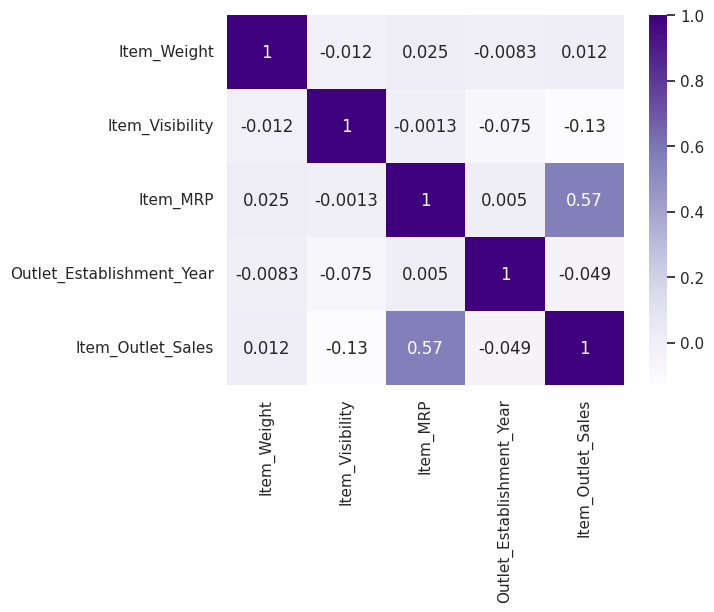

In [79]:
corr=vp_df_imp.corr()
sns.heatmap(corr,cmap='Purples', annot=True)

- *A partir de este gráfico se entiende que las ventas Item_Outlet_Sales tienen muy baja correlación con las columnas de tipo numérico, a excepción de la columna del Precio Máximo de Retail MRP, que muestra una correlación moderada de 0.57.  Aunque existe un moderado indicio de que a mayor precio mayores ventas, definitivamente no es suficiente para concluir mucho sobre el comportamiento de las ventas de cada Item.*



---


**2.** Generación de histograma para analizar comportamiento de ventas en relación a columnas no numéricas.

- Es de interés conocer la diferencia en el comportamiento de las ventas ```Item_Outlet_Sales``` por localidad ```Outlet_Location_Type```

In [80]:
# Valores unicos de Outlet_Location_Type
localidades=vp_df_imp['Outlet_Location_Type'].unique()
print(localidades)

['Tier 1' 'Tier 3' 'Tier 2']


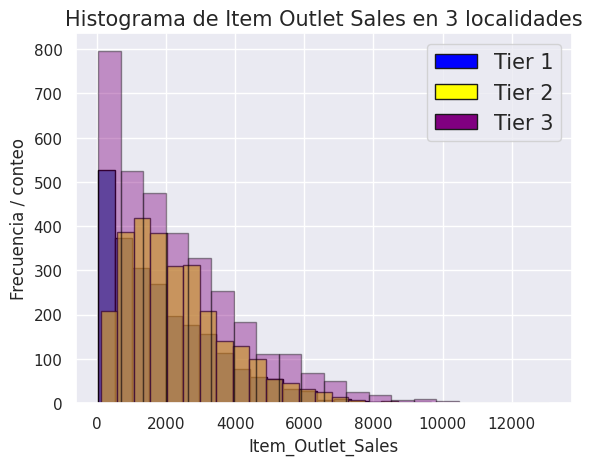

In [81]:
# Hay 3 localidades, se pueden generar tres histogramas para analizar
# el comportamiento de ventas
#FILTRO DE VENTAS TIER 1, TIER 2, TIER 3
filtrov1 = vp_df_imp['Outlet_Location_Type']=='Tier 1'
filtrov2 = vp_df_imp['Outlet_Location_Type']=='Tier 2'
filtrov3 = vp_df_imp['Outlet_Location_Type']=='Tier 3'

ventasT1 = vp_df_imp['Item_Outlet_Sales'][filtrov1]
ventasT2 = vp_df_imp['Item_Outlet_Sales'][filtrov2]
ventasT3 = vp_df_imp['Item_Outlet_Sales'][filtrov3]

#HISTOGRAMA DE VENTAS EN TRES LOCALIDADES

plt.title('Histograma de Item Outlet Sales en 3 localidades',fontsize=15)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frecuencia / conteo',fontsize=12)


pltv1=plt.hist(ventasT1, bins=20, ec='black')
pltv2=plt.hist(ventasT2, bins=20, color='yellow', alpha=0.7, ec='black')
pltv2=plt.hist(ventasT3, bins=20, color='purple', alpha=0.4, ec='black')
#alterar la propiedad alpaha para transparencia
#https://www.geeksforgeeks.org/change-the-line-opacity-in-matplotlib/#:~:text=Matplotlib%20allows%20you%20to%20regulate,such%20as%200.5%20or%200.25.

#PARA CREAR LEYENDA SE ESTABLECE UN COLOR PARA CADA HISTOGRAMA
#https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries
col1='blue'
col2='yellow'
col3='purple'

#SE GRABA UN RECTANGULO AMARILLO Y OTRO AZUL EN handles
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [col1,col2,col3]]
#EN labels SE LLAMA A CADA NOMBRE DE HISTOGRAMA
labels= ["Tier 1","Tier 2","Tier 3"]
plt.legend(handles, labels, loc='upper right',fontsize=15)

plt.style.use('fast') #estilo fast de matplotlib

- Del gráfico las ventas Items de las tres localidades definitivamente tienen comportamiento parecido, la forma de las tres distribuciones es muy parecida.  

- Se puede decir que en la localidad ```Tier 3```, existe mayor cantidad de items que se venden a precios ligeramente más bajos que en ```Tier2``` y ```Tier 3```, lo que apunta a que el promedio de ventas resulta menor en esta localidad.



---


**3.** Generación de histograma para verificar tamaño de ventas por
```Outlet_Size```.
- Podría ser interesante verificar si el tamaño de ventas tiene alguna correlación con  la columna de ```Item_Outlet_Sales```.

In [82]:
# Queremos conocer los valores de la columna Outlet_Size
tamanos=vp_df_imp['Outlet_Size'].unique()
print(tamanos)

['Medium' 'High' 'Small']


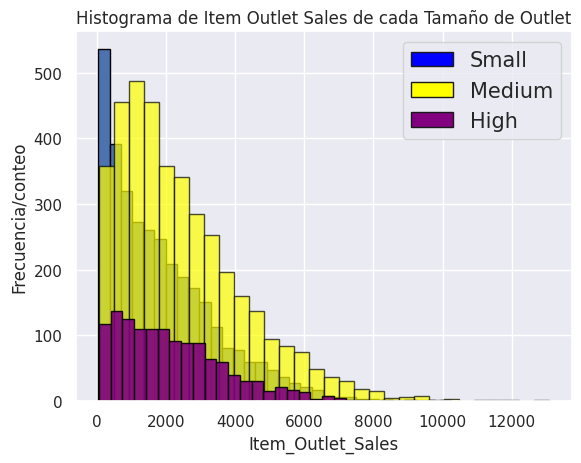

In [83]:
#Filtro de cada tamaño
#FILTRO DE TAMANO SMALL, HIGH, Y MEDIUM

filtroS=vp_df_imp['Outlet_Size']=='Small'
filtroM=vp_df_imp['Outlet_Size']=='Medium'
filtroH=vp_df_imp['Outlet_Size']=='High'

#FILTRAMOS POR VENTA
ventaS=vp_df_imp['Item_Outlet_Sales'][filtroS]
ventaM=vp_df_imp['Item_Outlet_Sales'][filtroM]
ventaH=vp_df_imp['Item_Outlet_Sales'][filtroH]

#HISTOGRAMA DE VENTAS DE ITEMS POR TAMAÑO DE OUTLET

plt.title('Histograma de Item Outlet Sales de cada Tamaño de Outlet')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frecuencia/conteo')

pltT1=plt.hist(ventaS, bins=30, ec='black')
pltT2=plt.hist(ventaM, bins=30, color='yellow', alpha=0.7, ec='black')
pltT3=plt.hist(ventaH, bins=30, color='purple', alpha=0.9, ec='black')

#alterar la propiedad alpaha para transparencia
#https://www.geeksforgeeks.org/change-the-line-opacity-in-matplotlib/#:~:text=Matplotlib%20allows%20you%20to%20regulate,such%20as%200.5%20or%200.25.

#PARA CREAR LEYENDA SE ESTABLECE UN COLOR PARA CADA HISTOGRAMA
#https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries
col1='blue'
col2='yellow'
col3='purple'

#SE GRABA UN RECTANGULO AMARILLO Y OTRO AZUL EN handles
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [col1,col2,col3]]
#EN labels SE LLAMA A CADA NOMBRE DE HISTOGRAMA
labels= ["Small","Medium","High"]
plt.legend(handles, labels, loc='upper right',fontsize=15)

plt.style.use('dark_background') #estilo de matplotlib


- Analizando los datos de ventas por ```Outlet_Size```, se observa que una gran cantidad de Items se venden en los Outlets tipo Medium, notablemente más que en los Outlets tipo High.  

- También vemos que para los Outlets tipo Medium, hay una mayor cantidad de Items con ventas ligeramente mayores que en los otros dos tamaños, la forma de su distribución (en amarillo) se encuentra menos sesgada a la derecha que la forma de las otras dos opciones.



---


**4.** Generación de boxplots

- Puede ser interesante conocer la relación entre los precios de los Items que se venden en distintos tipos de supermercado.

In [84]:
#Para obtener cuantos tipos de supermercado existen en los datos:

tipos_Outlet=vp_df_imp['Outlet_Type'].unique()
print(tipos_Outlet)

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


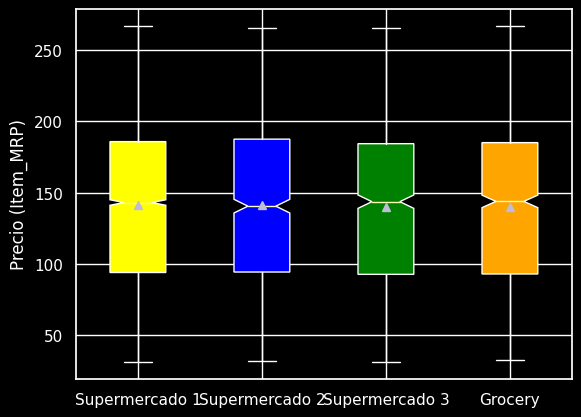

In [85]:
#Vemos que hay cuatro tipos de supermercado

#FILTROS DE POR TIPO DE SUPERMERCADO
filtroS1=vp_df_imp['Outlet_Type']==tipos_Outlet[0]
filtroS2=vp_df_imp['Outlet_Type']==tipos_Outlet[1]
filtroS3=vp_df_imp['Outlet_Type']==tipos_Outlet[3]
filtroG=vp_df_imp['Outlet_Type']==tipos_Outlet[2]

#FILTRADO DE LA COLUMNA DE PRECIOS
precioS1=vp_df_imp['Item_MRP'][filtroS1]
precioS2=vp_df_imp['Item_MRP'][filtroS2]
precioS3=vp_df_imp['Item_MRP'][filtroS3]
precioG=vp_df_imp['Item_MRP'][filtroG]

#BOXPLOTS
bxplt=plt.boxplot([precioS1,precioS2,precioS3,precioG], notch = True, \
             labels=['Supermercado 1', 'Supermercado 2', \
                     'Supermercado 3', 'Grocery'], showmeans=True,\
             patch_artist=True);

#CAMBIO DE COLORES DE BOXPLOT
#REF: https://onelinerhub.com/python-matplotlib/how-to-add-legend-to-boxplot
bxplt['boxes'][0].set_facecolor('yellow')
bxplt['boxes'][1].set_facecolor('blue')
bxplt['boxes'][2].set_facecolor('green')
bxplt['boxes'][3].set_facecolor('orange')

plt.ylabel('Precio (Item_MRP)');





- *El comportamiento de ```Item_MRP``` para cada tipo de Supermercado es muy parecido.  El precio promedio de Item es muy similar (señalado por los cuadrados pequeños en rojo).*  

- *También se observa que se venden Items de precios similares en las cuatro categorías.*

- *La distribución de precios en cada supermercado casi no tiene sesgo*

# PARTE 4.  VISUALIZACIONES Y TENDENCIAS
---
---

**1.** Tipo de producto vs Ventas
- Es de interés observar qué tipo de producto se ha vendido mejor en general.

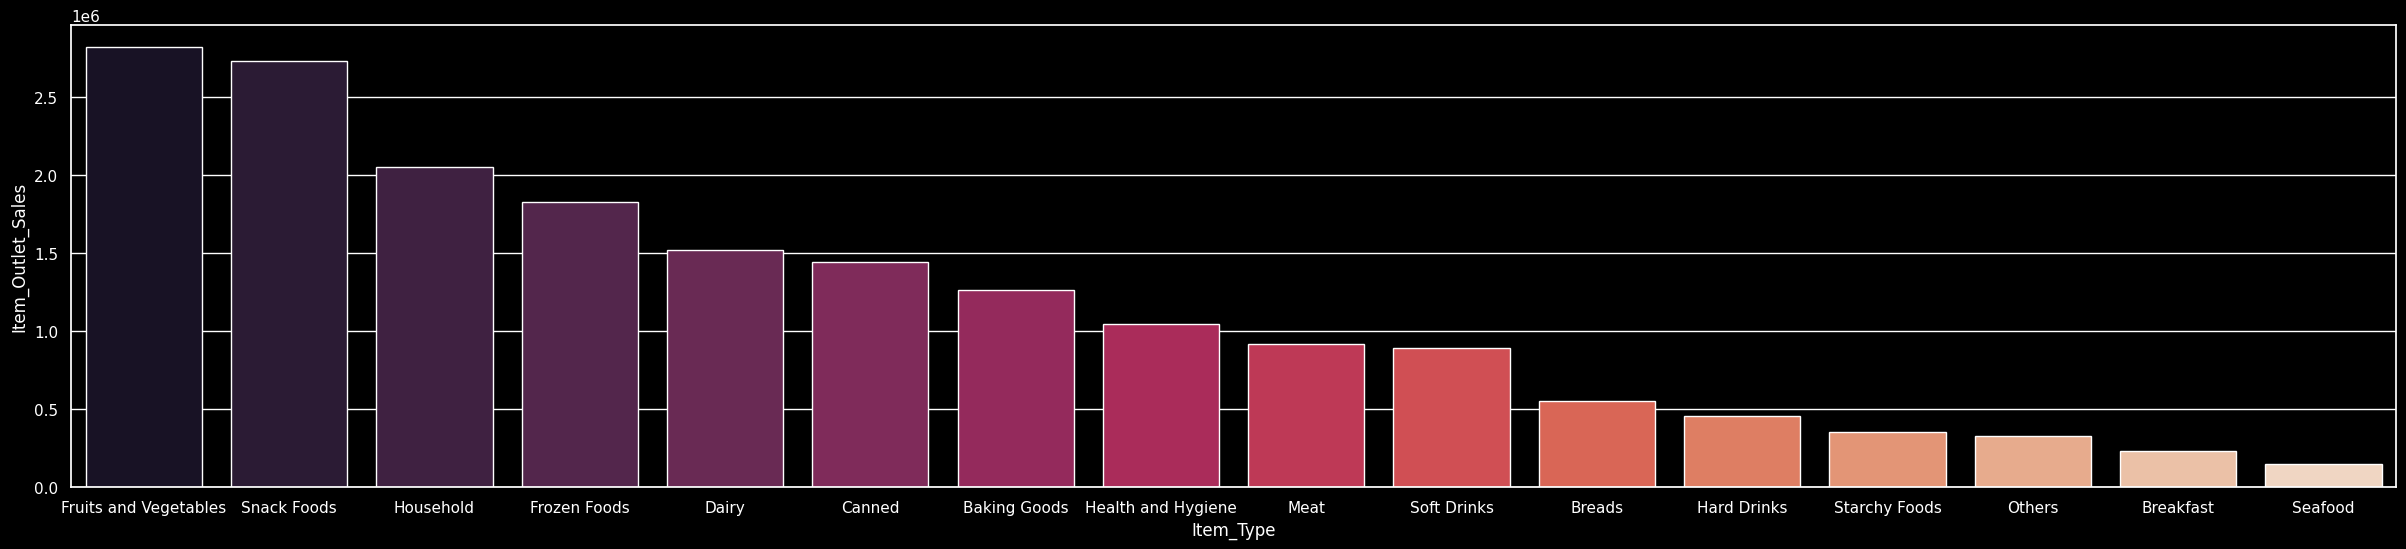

In [86]:
#Suma de ventas agrupados por tipo de producto
venta_por_tipo=vp_df_imp.groupby('Item_Type')['Item_Outlet_Sales'].\
 sum().round(2)

venta_por_tipo.sort_values(inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=[30,6])
sns.set_theme()
sns.barplot(x=venta_por_tipo.index, y=venta_por_tipo, palette="rocket");


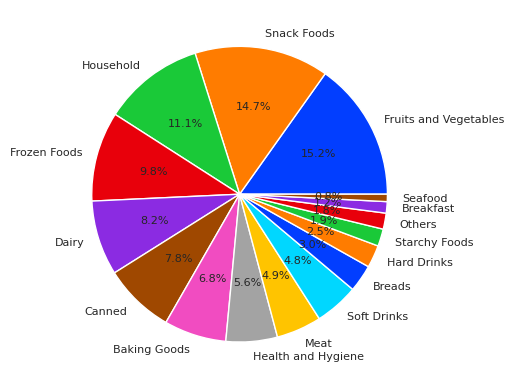

In [87]:
#Posiblemente es mejor visualizarlo en gráfico tipo pie:
fig, ax = plt.subplots()
colores=sns.color_palette('bright') #paleta de colores bright de seaborn
ax.pie(venta_por_tipo, labels=venta_por_tipo.index, autopct='%1.1f%%', textprops={'fontsize': 8}, colors=colores)
plt.show()

**2.**  Contenido de grasa vs Ventas

- Es de interés analizar el contenido de grasa y ventas de los diferentes items, para entender su relación.

In [88]:
vp_df_fat=vp_df_imp.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().reset_index()

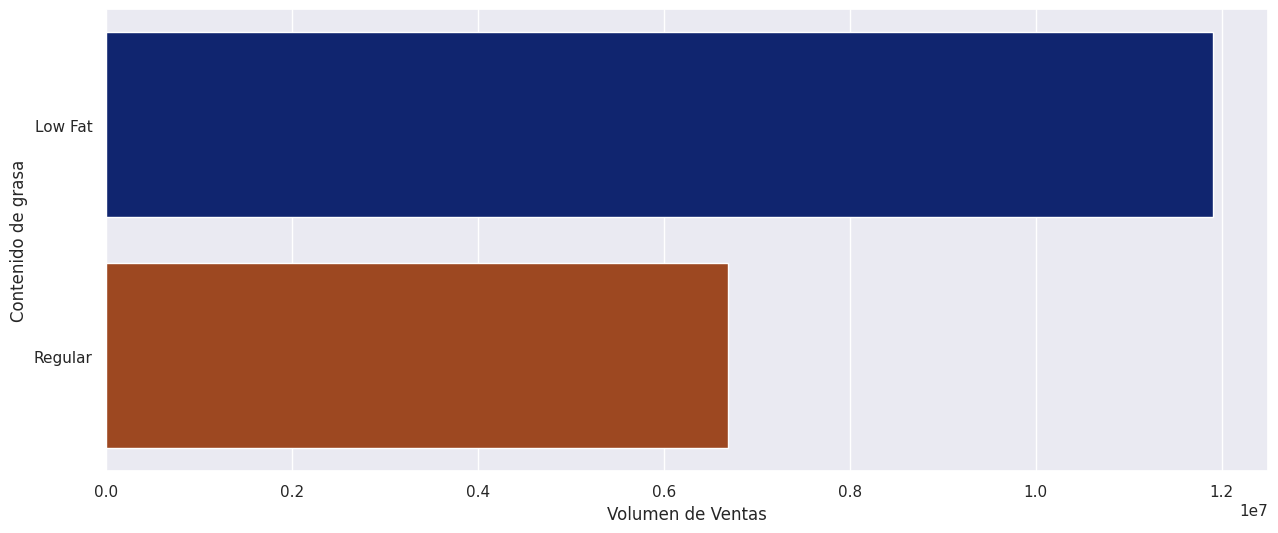

In [89]:
vp_df_fat.sort_values('Item_Outlet_Sales')

fig, ax = plt.subplots(figsize=[15,6])
sns.set_theme()
bar2=sns.barplot(y=vp_df_fat.Item_Fat_Content, \
               x=vp_df_fat.Item_Outlet_Sales, palette="dark")
bar2.set_xlabel('Volumen de Ventas')
bar2.set_ylabel('Contenido de grasa');

- Se venden muchos más productos bajos en grasa

**3.** Visibilidad del producto vs Ventas

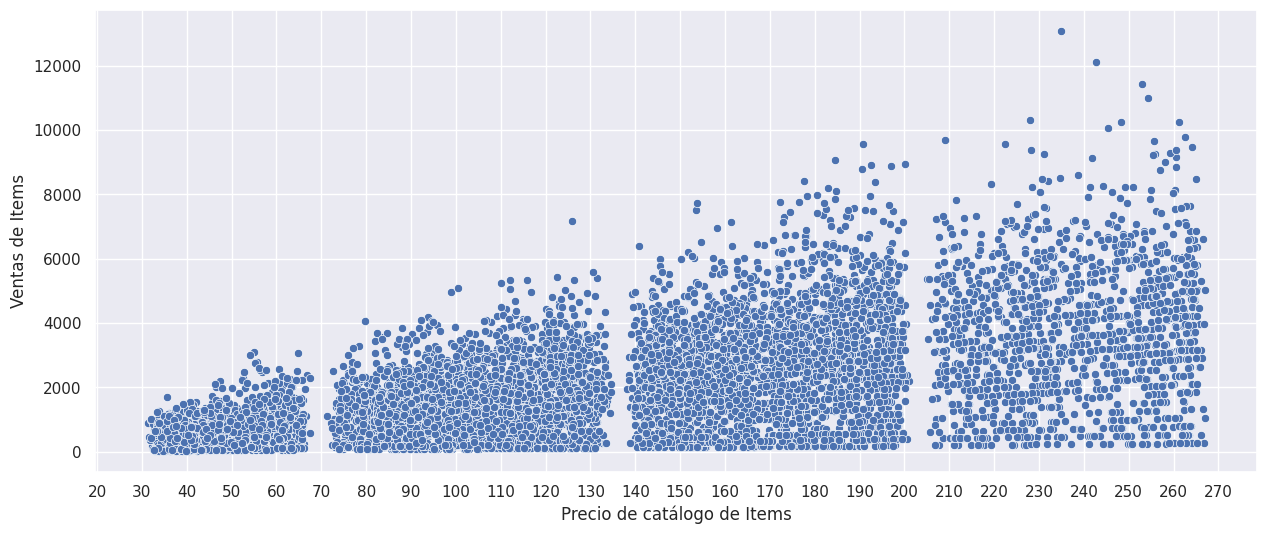

In [106]:
#Para analizar el impacto de la visibilidad de producto vs Ventas se puede utilizar
#un gráfico de dispersión
fig, ax = plt.subplots(figsize=[15,6])
#ax.set_xlim(0,70)
ax.set_xticks(range(0,300,10))
#REF https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn
scat1=sns.scatterplot(data=vp_df_imp, y=vp_df_imp.Item_Outlet_Sales, x=vp_df_imp.Item_MRP)
scat1.set_xlabel('Precio de catálogo de Items')
scat1.set_ylabel('Ventas de Items');

- Claramente es posible agrupar las ventas de cada ítem por grupo de precios.  Los productos se pueden agrupar según precio de 30 a 65, de 70 a 130, de 140 a 200, y de 210 a 265, cada uno con un promedio algo diferente de venta.  Los productos con precio de 210 a 270 parece que se venden, en promedio, en cantidades mayores.